### This Notebook Contains Some Bank Data Visualization:

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [16]:
# plt.style.use('classic')

In [31]:
bank = pd.read_csv('../Data/bank1/bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [44]:
bank.pdays=bank.pdays.apply(lambda x:  0 if x == -1 else x )

In [45]:
bank.pdays.value_counts()

0      8324
92      106
182      89
91       84
181      81
       ... 
579       1
515       1
491       1
475       1
651       1
Name: pdays, Length: 472, dtype: int64

In [108]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,52.076151,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.399706,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


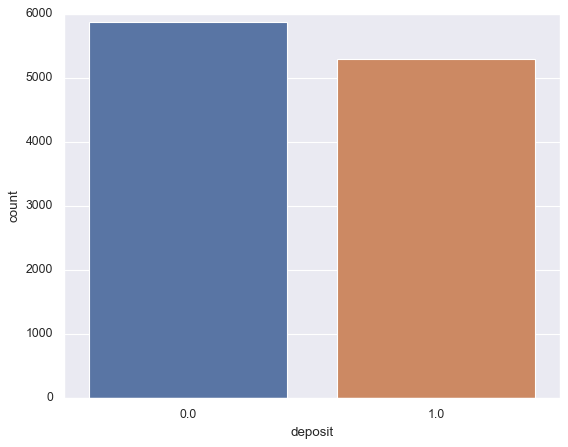

In [20]:
sns.countplot(x='deposit',data=encoded_data)

In [6]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.preprocessing import LabelEncoder

# this transformer convert every category column into numeric:
class numericEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoders = {}
    def fit(self,X,y=None):
        for col in X.columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self
    def transform(self,X):
        X = pd.DataFrame(X)
        transformed_X = pd.DataFrame() 
        transformed_X= X.apply(lambda x: self.encoders[x.name].transform(x).astype(float),axis=0)
        return transformed_X
    
encoder = numericEncoder()
encoded_data = encoder.fit_transform(bank)
encoded_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41.0,0.0,1.0,1.0,0.0,2288.0,1.0,0.0,2.0,4.0,8.0,1021.0,0.0,0.0,0.0,3.0,1.0
1,38.0,0.0,1.0,1.0,0.0,469.0,0.0,0.0,2.0,4.0,8.0,1283.0,0.0,0.0,0.0,3.0,1.0
2,23.0,9.0,1.0,1.0,0.0,1618.0,1.0,0.0,2.0,4.0,8.0,1246.0,0.0,0.0,0.0,3.0,1.0
3,37.0,7.0,1.0,1.0,0.0,2356.0,1.0,0.0,2.0,4.0,8.0,577.0,0.0,0.0,0.0,3.0,1.0
4,36.0,0.0,1.0,2.0,0.0,608.0,0.0,0.0,2.0,4.0,8.0,671.0,1.0,0.0,0.0,3.0,1.0
5,24.0,4.0,2.0,2.0,0.0,424.0,1.0,1.0,2.0,4.0,8.0,560.0,1.0,0.0,0.0,3.0,1.0
6,38.0,4.0,1.0,2.0,0.0,1241.0,1.0,1.0,2.0,5.0,8.0,1140.0,0.0,0.0,0.0,3.0,1.0
7,42.0,5.0,0.0,1.0,0.0,968.0,1.0,0.0,2.0,5.0,8.0,1009.0,0.0,0.0,0.0,3.0,1.0
8,19.0,9.0,1.0,1.0,0.0,425.0,1.0,0.0,2.0,5.0,8.0,606.0,0.0,0.0,0.0,3.0,1.0
9,10.0,7.0,2.0,1.0,0.0,3202.0,1.0,0.0,2.0,5.0,8.0,1197.0,2.0,0.0,0.0,3.0,1.0


In [118]:
def min_max_values(column):
    return min(column.values), max(column.values), len(column.unique())
bank.apply(min_max_values,axis=0)

age                    (18, 95, 76)
job           (admin., unknown, 12)
marital       (divorced, single, 3)
education     (primary, unknown, 4)
default                (no, yes, 2)
balance        (-6847, 81204, 3805)
housing                (no, yes, 2)
loan                   (no, yes, 2)
contact      (cellular, unknown, 3)
day                     (1, 31, 31)
month                (apr, sep, 12)
duration            (2, 3881, 1428)
campaign                (1, 63, 36)
pdays                 (0, 854, 472)
previous                (0, 58, 34)
poutcome      (failure, unknown, 4)
deposit                (no, yes, 2)
dtype: object

age          None
job          None
marital      None
education    None
default      None
balance      None
housing      None
loan         None
contact      None
day          None
month        None
duration     None
campaign     None
pdays        None
previous     None
poutcome     None
deposit      None
dtype: object

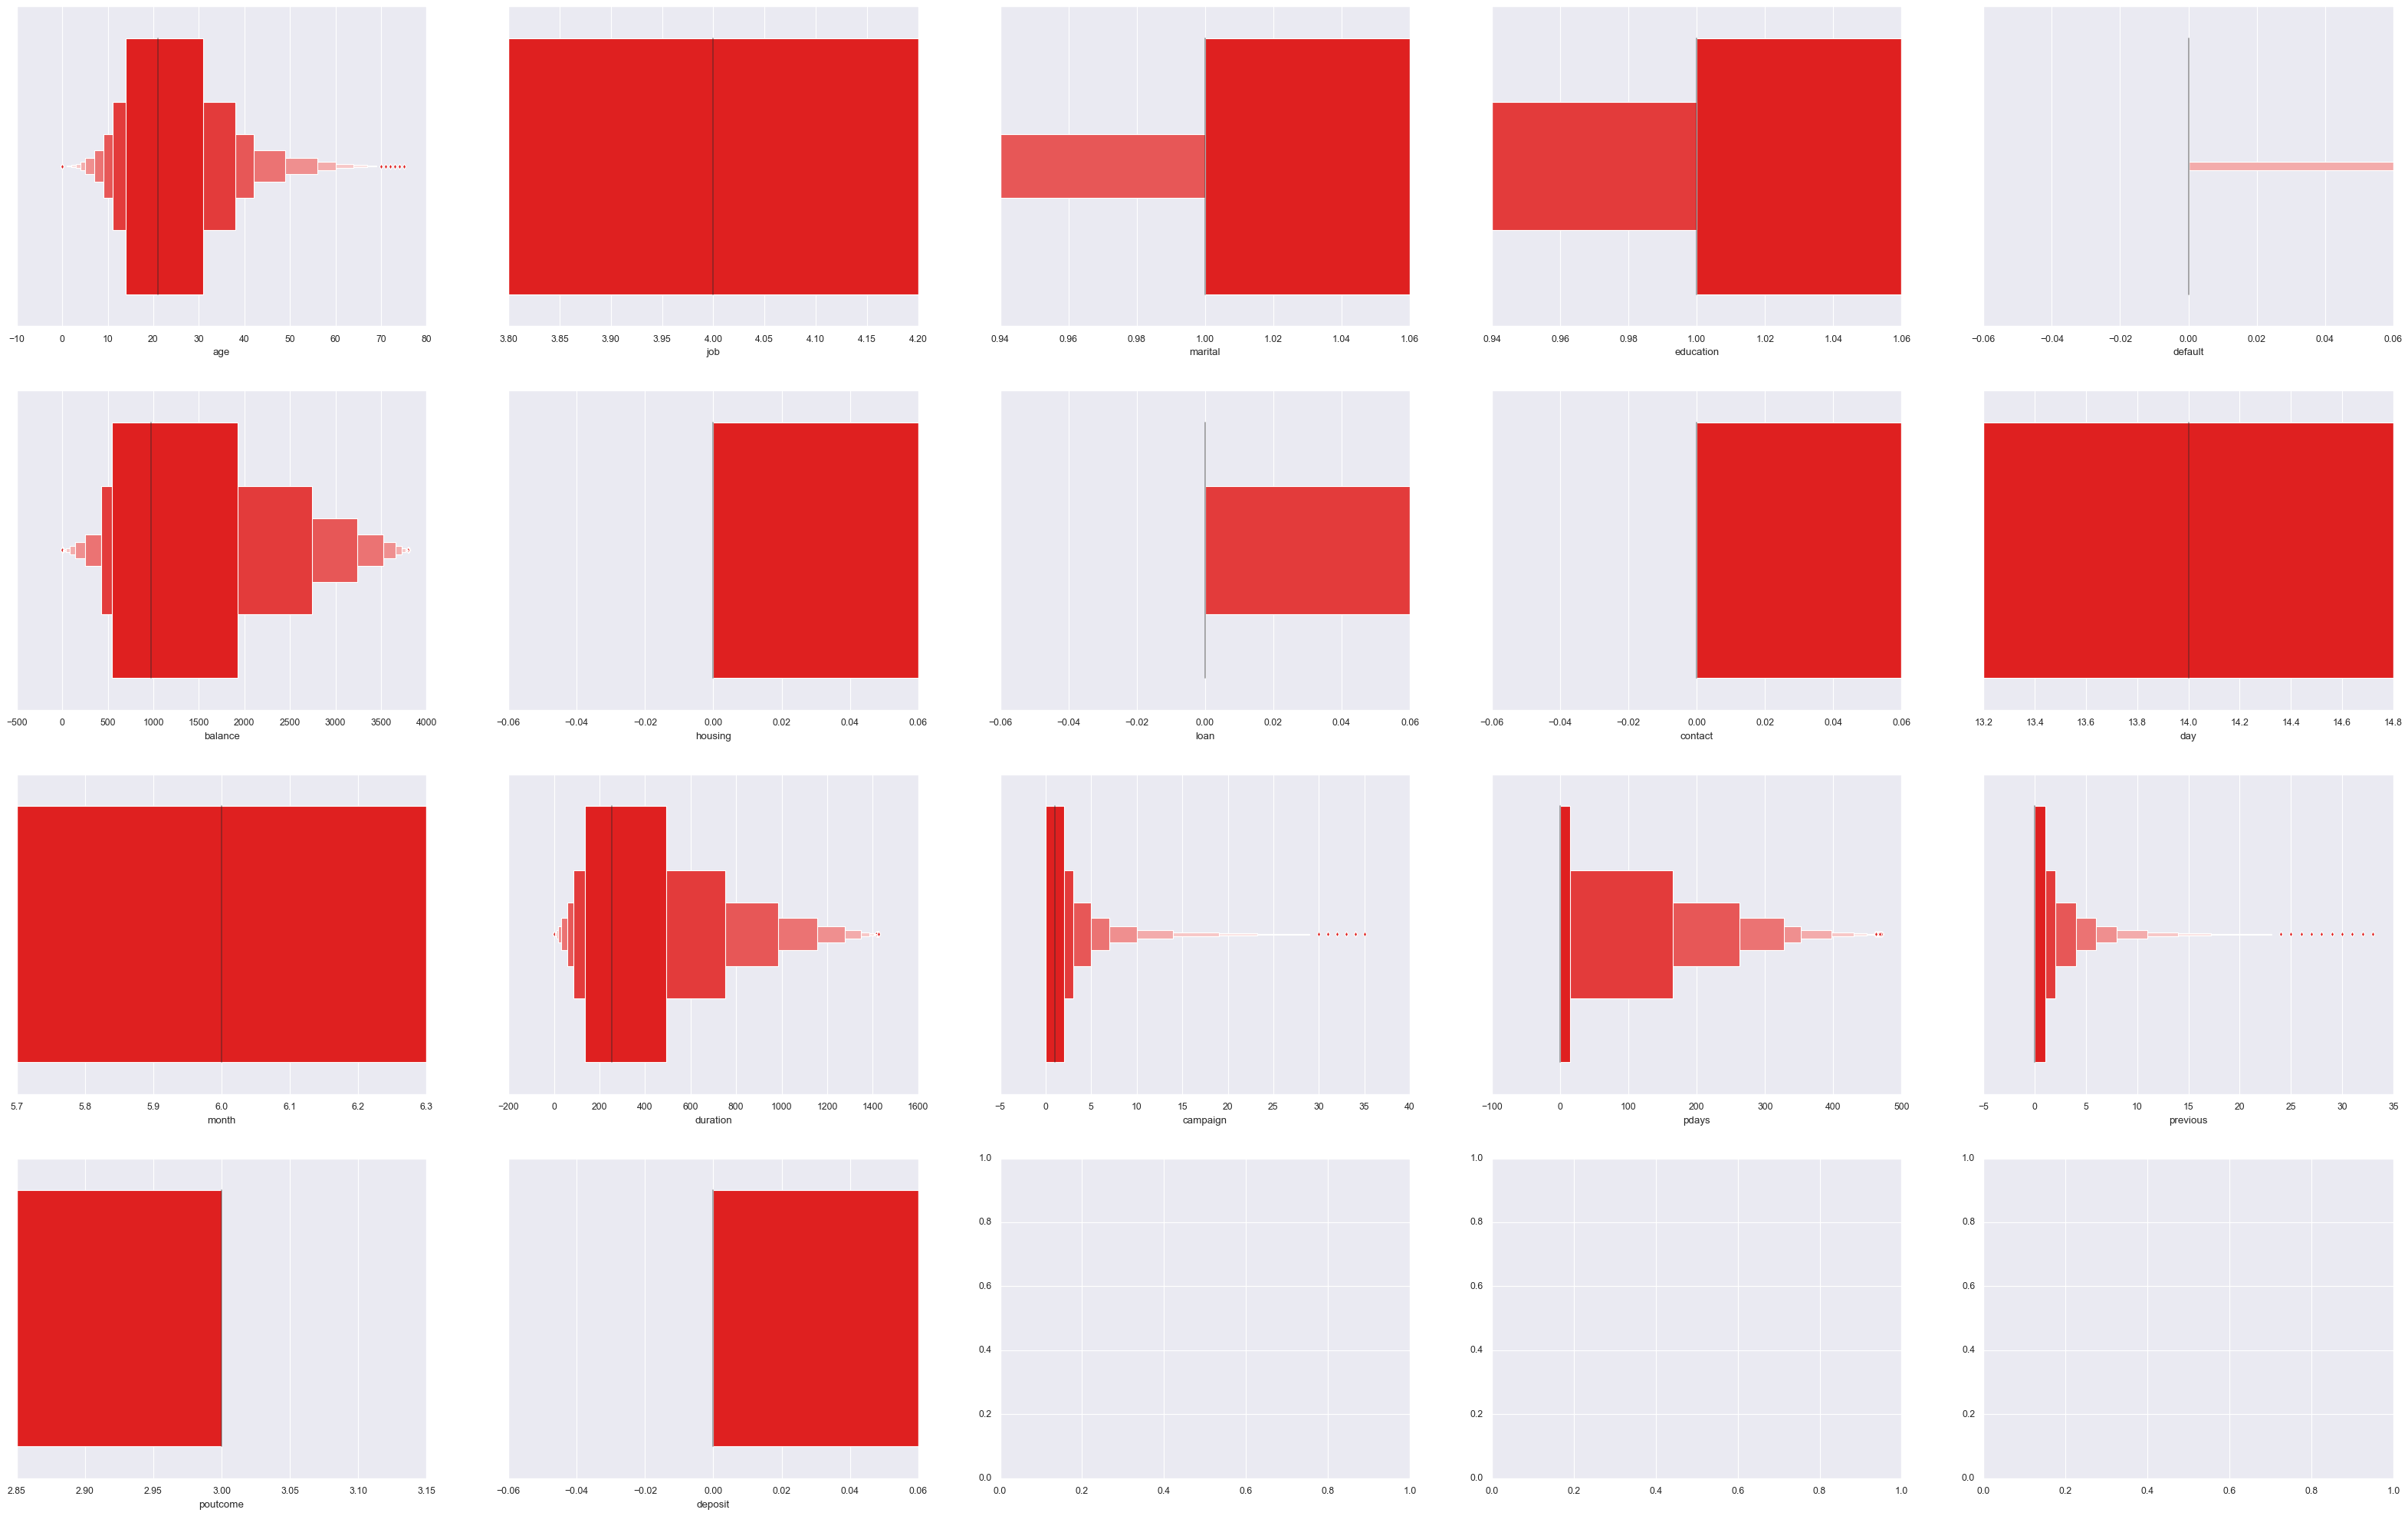

In [21]:
# this function to plotting all features togather
from collections import Counter
def plot_features(column,axes,co):
    try:
        sns.boxenplot(column,ax=axes[co['x'],co['y']],color='red')
        if co['y']>= 4:
            co['x']+=1
            co['y']=0
        else:
            co['y']+=1
    except Exception as ex:
        
        print(column.name,":",ex) 

fig, axes = plt.subplots(4, 5, figsize=(50, 30))
co = Counter()

encoded_data.apply(plot_features,axis=0,axes=axes,co=co)

In [72]:
encoded_data[['pdays', 'deposit']].loc[892]

pdays      0.0
deposit    1.0
Name: 892, dtype: float64

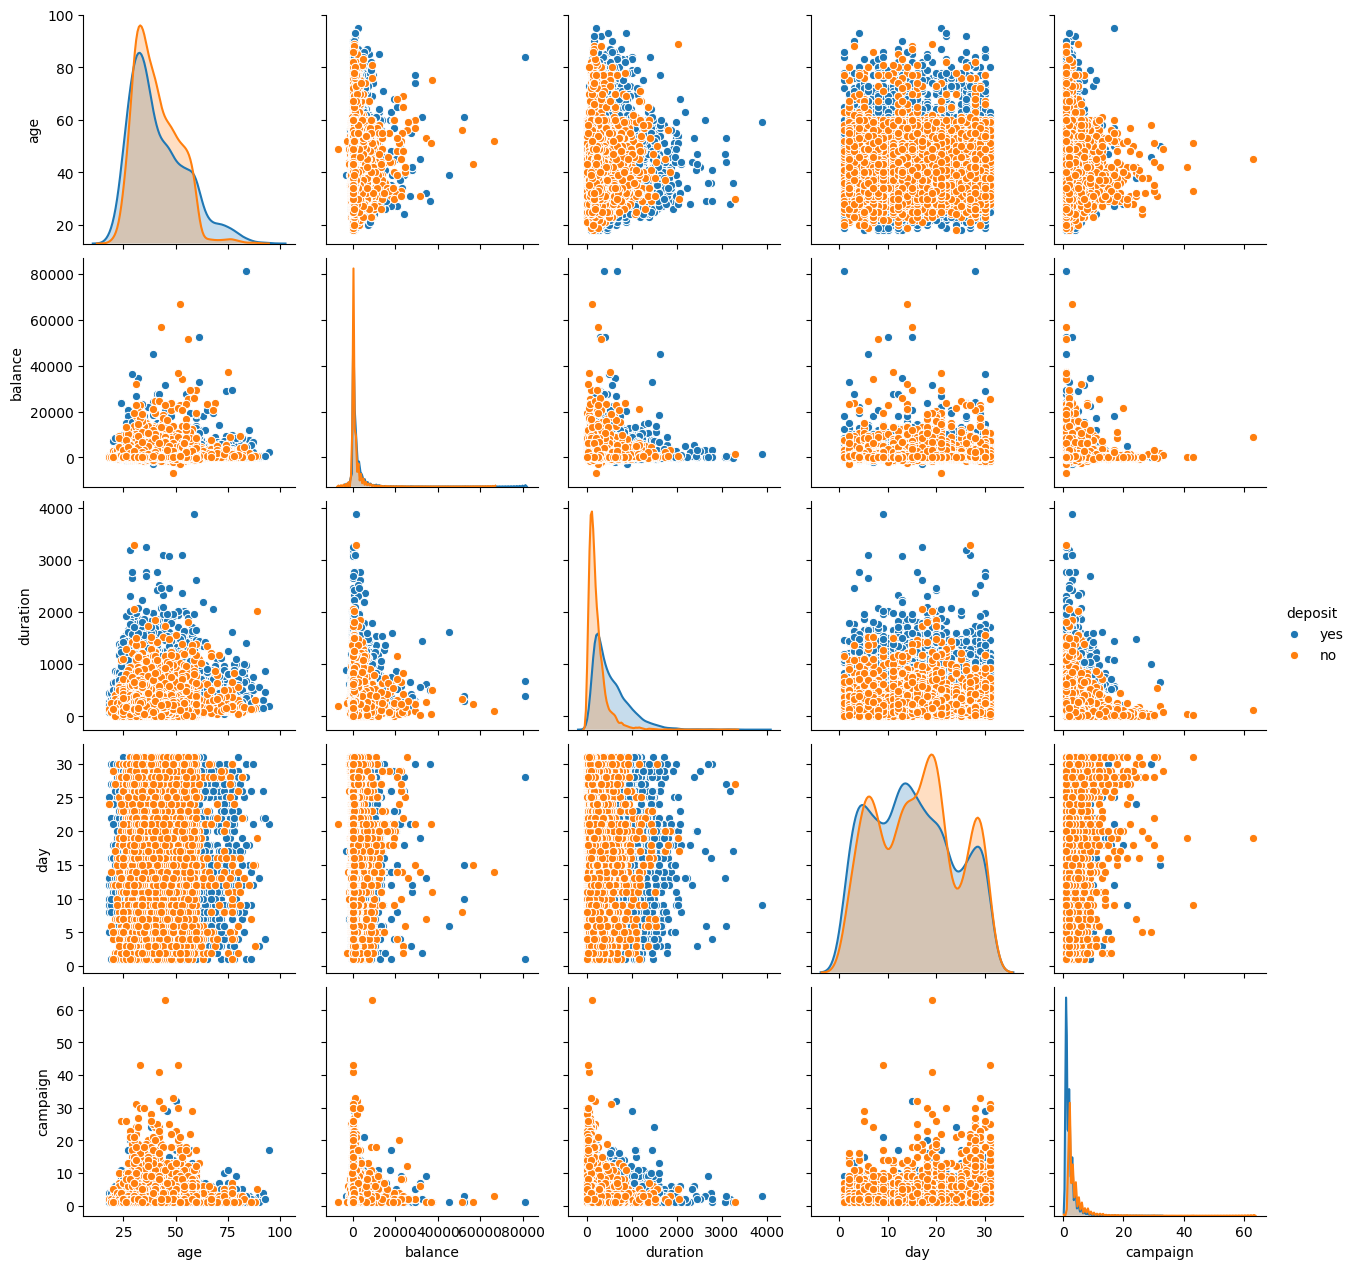

In [85]:
sns.pairplot(bank[['age','balance','duration','day','campaign','poutcome', 'deposit']], hue='deposit')
# ,
# sns.reset_defaults()
# sns.catplot(bank['balance'].values,bank['deposit'].values,data=bank,kind='strip')

In [81]:
pd.crosstab(bank['deposit'],bank['job'],).apply(lambda x:x/x.sum()*100)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,52.698651,63.580247,62.5,60.218978,49.298519,33.676093,53.82716,60.021668,25.277778,53.922106,43.417367,51.428571
yes,47.301349,36.419753,37.5,39.781022,50.701481,66.323907,46.17284,39.978332,74.722222,46.077894,56.582633,48.571429


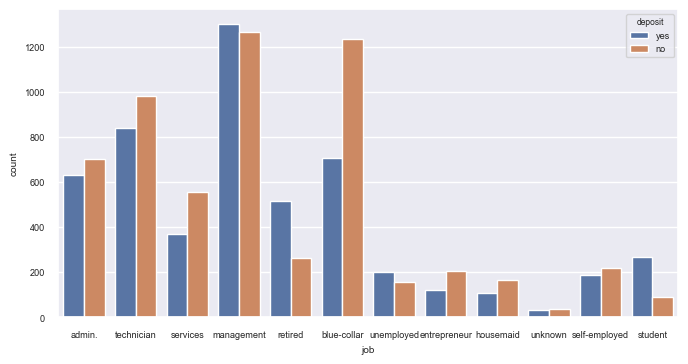

In [114]:
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.6)
sns.countplot(bank['job'],hue=bank['deposit'])

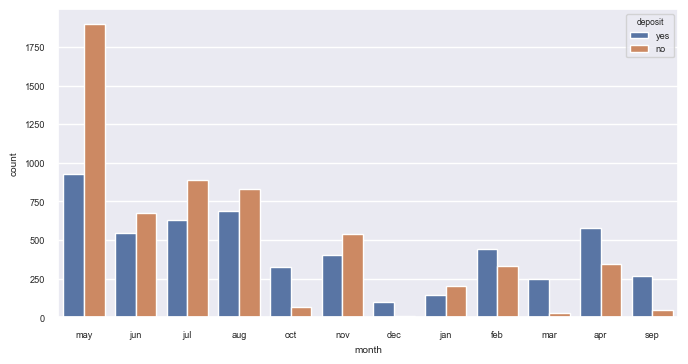

In [115]:
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.6)
sns.countplot(bank['month'],hue=bank['deposit'])

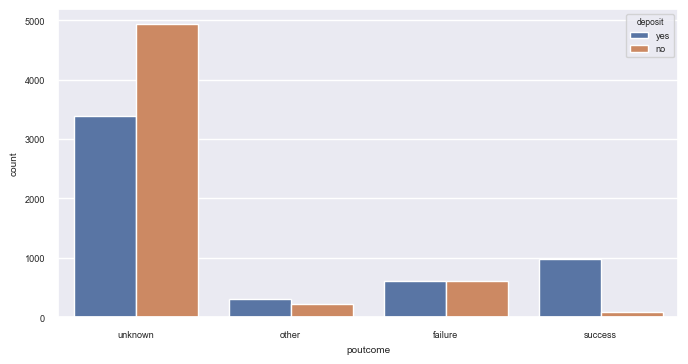

In [116]:
plt.figure(figsize=(8,4))
sns.set(font_scale = 0.6)
sns.countplot(bank['poutcome'],hue=bank['deposit'])

In [123]:
plt.figure(figsize=(100,100))
sns.set(font_scale = 5)
sns.countplot(bank['job'],hue=bank['deposit'])

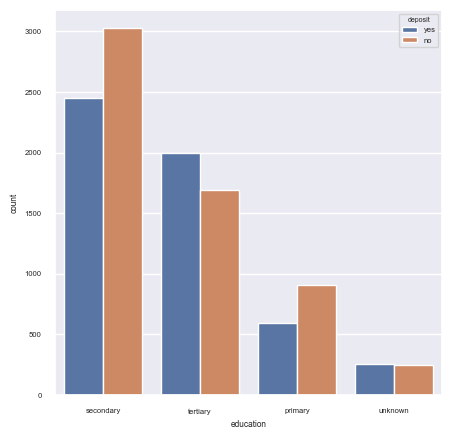

In [132]:
# plt.rcdefaults()
plt.figure(figsize=(5,5))
sns.set(font_scale = 0.5)
sns.countplot(bank['education'],hue=bank['deposit'])
# sns.jointplot(bank['pdays'],encoded_data['deposit'],kind='kde')
# sns.catplot(bank['balance'],encoded_data['deposit'],data=bank,kind='strip')

In [24]:
bank_cat = bank.select_dtypes(include='O')
bank_cat.head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
5,management,single,tertiary,no,yes,yes,unknown,may,unknown,yes
6,management,married,tertiary,no,yes,yes,unknown,may,unknown,yes
7,retired,divorced,secondary,no,yes,no,unknown,may,unknown,yes
8,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
9,services,single,secondary,no,yes,no,unknown,may,unknown,yes


### Categorical Features Dist:

In [25]:
pos =1
plt.figure(figsize=(100,100))

for i in bank_cat.columns:
    sns.set(font_scale = 5)
    plt.subplot(5,2,pos)
    sns.countplot(bank[i])
    plt.title(i,fontweight="bold",fontsize=50) 
    pos +=1
    plt.tight_layout()

### Job:

([<matplotlib.patches.Wedge at 0x141019886c8>,
 [Text(0.9904561305301007, 0.8725804567461618, 'admin.'),
  Text(-0.5391766919351408, 1.2048603632263277, 'technician'),
  Text(-1.3146832156672692, 0.11835557630618394, 'services'),
  Text(-0.9208194431308994, -0.9457756357361404, 'management'),
  Text(-0.17999597552060848, -1.3076702370232278, 'retired'),
  Text(0.6103202998882116, -1.7146163219637107, 'blue-collar'),
  Text(1.1372099442398567, -1.420969226521807, 'unemployed'),
  Text(1.025934008179731, -0.8305777572631425, 'entrepreneur'),
  Text(1.171592080328106, -0.6080888070935536, 'housemaid'),
  Text(2.2257894517383776, -0.6544167758624259, 'unknown'),
  Text(1.3110490616599673, -0.15346125869586555, 'self-employed'),
  Text(2.3195497497888335, -0.045705122848095955, 'student')],
 [Text(0.540248798470964, 0.4759529764069973, '22.99'),
  Text(-0.29409637741916766, 0.6571965617598151, '17.42'),
  Text(-0.7170999358185104, 0.06455758707610032, '16.33'),
  Text(-0.5022651507986724, -

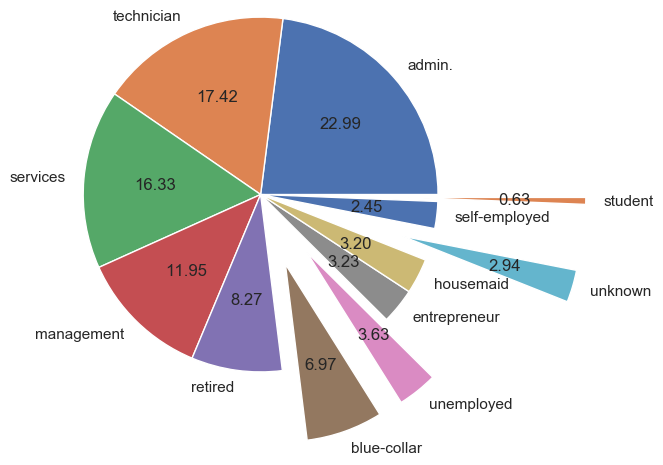

In [26]:
plt.rcdefaults()
sns.set(font_scale = 1)=
plt.pie(bank['job'].value_counts(),autopct='%.2f',radius=1.2,explode=[0,0,0,0,0,0.5,0.5,0,0,1,0,1],
        shadow=False,labels=bank['job'].unique().tolist())

### Education

([<matplotlib.patches.Wedge at 0x14101a15088>,
 [Text(0.03900391781306229, 1.319423622039272, 'secondary'),
  Text(-0.7361690707623763, -1.0956528187582324, 'tertiary'),
  Text(1.0079341524642111, -0.852331358273443, 'primary'),
  Text(1.3071066984061916, -0.18404368769850601, 'unknown')],
 [Text(0.02127486426167034, 0.7196856120214211, '49.06'),
  Text(-0.401546765870387, -0.5976288102317631, '33.05'),
  Text(0.5497822649804788, -0.46490801360369616, '13.44'),
  Text(0.7129672900397409, -0.10038746601736691, '4.45')])

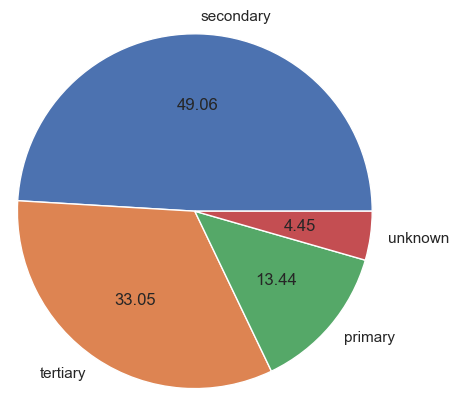

In [27]:
plt.rcdefaults()
sns.set(font_scale = 1)
plt.pie(bank['education'].value_counts(),autopct='%.2f',radius=1.2,explode=[0,0,0,0],
        shadow=False,labels=bank['education'].unique().tolist())

### Contact:

([<matplotlib.patches.Wedge at 0x14101a6c2c8>,
 [Text(-0.7024442298096565, 0.8465058204212885, 'unknown'),
  Text(0.5028897460304652, -0.9783158504989145, 'cellular'),
  Text(1.0740018800985787, -0.23773927219691363, 'telephone')],
 [Text(-0.3831513980779944, 0.4617304475025209, '72.05'),
  Text(0.2743034978347992, -0.5336268275448623, '21.02'),
  Text(0.5858192073264974, -0.12967596665286196, '6.93')])

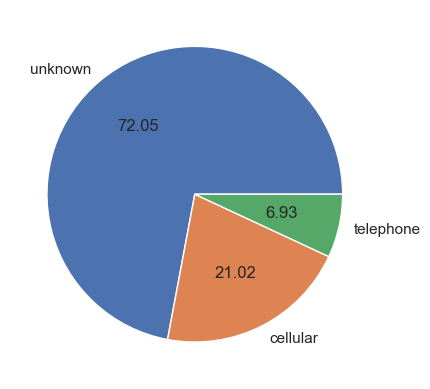

In [28]:
plt.rcdefaults()
sns.set(font_scale = 1)
plt.pie(bank['contact'].value_counts(),autopct='%.2f',radius=1.0,explode=[0,0,0],
        shadow=False,labels=bank['contact'].unique().tolist())

### Month

([<matplotlib.patches.Wedge at 0x14101abd608>,
 [Text(0.924539040352595, 0.9421398849766965, 'may'),
  Text(-0.5698556718307689, 1.1906571770590824, 'jun'),
  Text(-1.2719099397128177, 0.3530511368905872, 'jul'),
  Text(-1.1588518332229283, -0.6320304016705672, 'aug'),
  Text(-0.5885508531144389, -1.1815277793172136, 'oct'),
  Text(0.0831650905424808, -1.3173775342380258, 'nov'),
  Text(0.6800588498371353, -1.1313354766638377, 'dec'),
  Text(1.0088929414153798, -0.8511962363416694, 'jan'),
  Text(1.162391039809802, -0.6254974584839552, 'feb'),
  Text(1.2582560511992928, -0.3989883577504022, 'mar'),
  Text(1.3071584206213518, -0.18367597392880083, 'apr'),
  Text(1.3193674217871187, -0.040860816521594734, 'sep')],
 [Text(0.5042940220105063, 0.5138944827145617, '25.3'),
  Text(-0.31083036645314666, 0.649449369304954, '13.6'),
  Text(-0.6937690580251733, 0.19257334739486573, '13.6'),
  Text(-0.6321009999397791, -0.344743855456673, '10.9'),
  Text(-0.3210277380624212, -0.6444696978093892, '

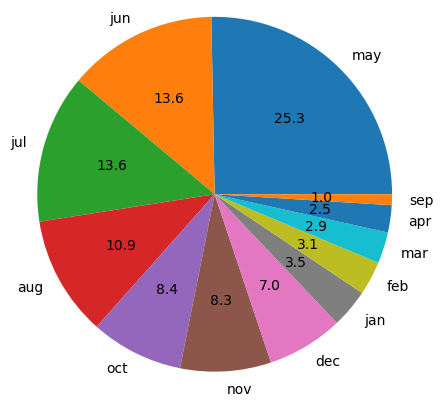

In [29]:
plt.rcdefaults()
plt.pie(bank['month'].value_counts(),labels=bank['month'].unique().tolist(),autopct='%.1f',radius=1.2,)